<a href="https://colab.research.google.com/github/seabnavin19/TradingBot/blob/main/Back_Testin_FinTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install   fastquant



     |████████████████████████████████| 5.3 MB 12.9 MB/s 
     |████████████████████████████████| 138 kB 75.2 MB/s 
     |████████████████████████████████| 2.4 MB 59.6 MB/s 
     |████████████████████████████████| 9.5 MB 68.2 MB/s 
     |████████████████████████████████| 410 kB 64.8 MB/s 
     |████████████████████████████████| 6.4 MB 70.7 MB/s 
     |████████████████████████████████| 195 kB 77.3 MB/s 
     |████████████████████████████████| 503 kB 69.7 MB/s 
     |████████████████████████████████| 1.4 MB 58.6 MB/s 
     |████████████████████████████████| 97 kB 9.1 MB/s 
     |████████████████████████████████| 1.5 MB 55.8 MB/s 
     |████████████████████████████████| 843 kB 71.5 MB/s 
     |████████████████████████████████| 97 kB 9.6 MB/s 
     |████████████████████████████████| 1.1 MB 69.7 MB/s 
     |████████████████████████████████| 1.1 MB 61.8 MB/s 
     |████████████████████████████████| 3.6 MB 47.0 MB/s 
     |████████████████████████████████| 271 kB 73.1 MB/s 
     |████████████

In [ ]:
def load_data(ticker,START,TODAY):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
from datetime import date
import yfinance as yf
START = "2018-02-28"
TODAY = date.today().strftime("%Y-%m-%d")
df=load_data("AMZN",START,TODAY)
# df.to_csv("me.csv")]
df.shape

[*********************100%***********************]  1 of 1 completed


(1000, 7)

In [ ]:
df


ModuleNotFoundError: ignored

ImportError: ignored

In [ ]:
!pip install alpaca_trade_api

     |████████████████████████████████| 45 kB 3.5 MB/s 
     |████████████████████████████████| 103 kB 31.8 MB/s 
     |████████████████████████████████| 273 kB 67.8 MB/s 
     |████████████████████████████████| 53 kB 2.9 MB/s 
     |████████████████████████████████| 1.3 MB 68.1 MB/s 
     |████████████████████████████████| 636 kB 92.1 MB/s 
  Attempting uninstall: async-timeout
    Found existing installation: async-timeout 4.0.2
    Uninstalling async-timeout-4.0.2:
      Successfully uninstalled async-timeout-4.0.2
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.3
    Uninstalling msgpack-1.0.3:
      Successfully uninstalled msgpack-1.0.3
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.1
    Uninstalling aiohttp-3.8.1:
      Successfully uninstalled aiohttp-3.8.1
ERROR: pip's depen

In [ ]:
import alpaca_trade_api as tradeapi
import numpy as np
import time
SEC_KEY = 'x0NQzGya3LQKsMyf5o3taJrzrEYzb2QRQpIO22wO'
PUB_KEY = 'PKBWQACSNDFI07SNKACP'
BASE_URL = 'https://paper-api.alpaca.markets'
api = tradeapi.REST(key_id= PUB_KEY, secret_key=SEC_KEY, base_url=BASE_URL)



In [ ]:
def get_data():
    # Returns a an numpy array of the closing prices of the past 5 minutes
    market_data = api.get_barset(symb, 'minute', limit=1000)
    
    close_list = []
    for bar in market_data[symb]:
        close_list.append(bar.c)
    
    close_list = np.array(close_list, dtype=np.float64)

    return close_list
symb = "AMZN" # Ticker of stock you want to trade
pos_held = False

In [ ]:
lis= get_data()
len(lis)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  This is separate from the ipykernel package so we can avoid doing imports until


1000

In [ ]:
df["CloseT"]=lis
df["Close"]=lis

In [ ]:
df

ModuleNotFoundError: ignored

ImportError: ignored

In [ ]:

df=df.rename(columns={"Date":"dt","CloseT":"close"})
df=df.set_index("dt")
# df.head()

In [ ]:
df.tail()

ModuleNotFoundError: ignored

ImportError: ignored

## All fastquant strategies


In [ ]:
# from fastquant import get_stock_data
# df = get_stock_data("AAPL", "2018-01-01", "2022-01-01")
# df.head()
# from fastquant import backtest
# df.head()


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- COIN: Data doesn't exist for startDate = 1577836800, endDate = 1609459200


Empty DataFrame
Columns: [open, high, low, close, volume]
Index: []

### new sentiment

In [ ]:
from fastquant import get_yahoo_data, get_bt_news_sentiment
data = get_yahoo_data("TSLA", "2020-01-01", "2020-07-04")
sentiments = get_bt_news_sentiment(keyword="tesla", page_nums=3)
backtest("sentiment", data, sentiments=sentiments, senti=0.2)

# Starting Portfolio Value: 100000.00
# Final Portfolio Value: 313198.37
# Note: Unfortunately, you can't recreate this scenario due to inconsistencies in the dates and sentiments that is scraped by get_bt_news_sentiment. In order to have a quickstart with News Sentiment Strategy you need to make the dates consistent with the sentiments that you are scraping.

from fastquant import get_yahoo_data, get_bt_news_sentiment
from datetime import datetime, timedelta

# we get the current date and delta time of 30 days
current_date = datetime.now().strftime("%Y-%m-%d")
delta_date = (datetime.now() - timedelta(30)).strftime("%Y-%m-%d")
data = get_yahoo_data("TSLA", delta_date, current_date)
sentiments = get_bt_news_sentiment(keyword="tesla", page_nums=3)
backtest("sentiment", data, sentiments=sentiments, senti=0.2)

[*********************100%***********************]  1 of 1 completed


 67%|██████▋   | 2/3 [00:00<00:00,  2.47it/s]


KeyboardInterrupt: ignored

## Create Custom Strategies

In [ ]:
# !pip install PyAlgoTrade
# !pip install backtrader
# !pip install yfinance
# !pip install fastquant
# res
from datetime import datetime
from fastquant import backtest
import backtrader as bt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline




# for i in range(10):
#   print(i)

### RSI Strategy

In [ ]:
class RsiStrategy(bt.Strategy):

    def __init__(self):
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

    def next(self):
        if not self.position:
            if self.rsi < 10:
                self.buy(size=100)
        else:
            if self.rsi > 70:
                self.sell(size=100)

### simple moving average strategies

In [ ]:
class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=[5,10],  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


### simple custome strategies

In [ ]:
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)

        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        print(self.datas[0].close[0],self.datas[0].close[-1],self.datas[0].close[-2])

    def next(self):
        # Simply log the closing price of the series from the reference
        print('Close, %.2f' % self.dataclose[0])

        if self.dataclose[0] < self.dataclose[-1]:
            # current close less than previous close

            if self.dataclose[-1] < self.dataclose[-2]:
                # previous close less than the previous close

                # BUY, BUY, BUY!!! (with all possible default parameters)
                print('BUY CREATE, %.2f' % self.dataclose[0])
                self.buy()
          
       
class TestStrategy1(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)

        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        print(self.datas[0].close[0],self.datas[0].close[-1],self.datas[0].close[-2])

    def next(self):
        # Simply log the closing price of the series from the reference
        print('Close, %.2f' % self.dataclose[0])

        if self.dataclose[0] < self.dataclose[-1]:
            # current close less than previous close

            if self.dataclose[-1] < self.dataclose[-2]:
                # previous close less than the previous close

                # BUY, BUY, BUY!!! (with all possible default parameters)
                print('BUY CREATE, %.2f' % self.dataclose[0])
                self.buy()
        v=0       
        l=[]
        for i in range(5):
          l.append(self.dataclose[v])
          v-=1
        if l==list(set(l))[::-1]:
          self.sell()
  
  


### load Data

In [ ]:
data=yf.download("SPY", '2021-01-01', '2021-07-01', auto_adjust=True)
data.to_csv("spy.csv")

[*********************100%***********************]  1 of 1 completed


### EDA

In [ ]:
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/stock_data/Generate_Base_On_Stock/1 CKH HOLDINGS.csv",parse_dates=True)
df.head()

Unnamed: 0        Date  Close
0           0  2020-01-01    0.0
1           1  2020-01-02   74.5
2           2  2020-01-03   74.1
3           3  2020-01-04    0.0
4           4  2020-01-05    0.0

In [ ]:
# df["CLOSING"].plot()
df.dtypes,df.shape

(Unnamed: 0      int64
 Date           object
 Close         float64
 dtype: object, (628, 3))

In [ ]:
df1=make_to_fit_form(df)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Close
dt               
2020-01-01    0.0
2020-01-02   74.5
2020-01-03   74.1
2020-01-04    0.0
2020-01-05    0.0
...           ...
2021-09-14   54.6
2021-09-15   54.3
2021-09-16   53.7
2021-09-17   52.5
2021-09-18    0.0

[627 rows x 1 columns]

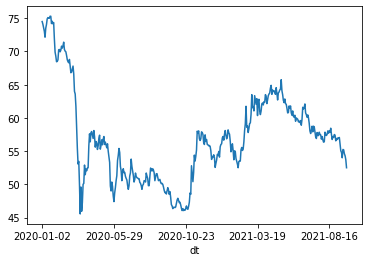

In [ ]:
df1=df1[df1["Close"]!=0]
df1["Close"].plot()

In [ ]:
df1.shape

(425, 1)

### Strategies

In [ ]:
def Multi_strategies(df):
  strats_opt = { 
      "smac": {"fast_period": [10,15,20], "slow_period":[40,45,50]}, 
      'bbands':{"period":[20,10,30], "devfactor":[2.0,3.0,5.0]},
     

  } 

  res_opt = backtest("multi", df, strats=strats_opt,plot=False)
  return res_opt

def Multi_strategies1(df):
  strats_opt = { 
      "rsi": {"rsi_lower": [5,10,30], "rsi_upper": [50.70,30]} , 
      'bbands':{"period":[20,10,30], "devfactor":[2.0,3.0,5.0]},
     

  } 

  res_opt = backtest("multi", df, strats=strats_opt,plot=False)
  return res_opt

 

In [ ]:
def HyperRsi(df):
  results=[]
  final_values=[]
  rsi_uppers=[60,70,80,50,30]
  rsi_lowers=[5,10,30,40]
  rsi_periods=[14,18,23]
  for i in rsi_uppers:
    for j in rsi_lowers:
      for k in rsi_periods:
          result=backtest('rsi', df, rsi_period=k, rsi_upper=i, rsi_lower=j,plot=False)
          results.append(result)
          final_values.append(result.final_value[0])
    
  max_index=final_values.index(max(final_values))
  best_result= results[max_index]
  return best_result


In [ ]:
re=HyperRsi(df)

Starting Portfolio Value: 100000.00
2022-02-09T00:00:00, ===Global level arguments===
2022-02-09T00:00:00, init_cash : 100000
2022-02-09T00:00:00, buy_prop : 1
2022-02-09T00:00:00, sell_prop : 1
2022-02-09T00:00:00, commission : 0
2022-02-09T00:00:00, stop_loss : 0
2022-02-09T00:00:00, stop_trail : 0
2022-02-09T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 60
rsi_lower : 5
2022-02-09T00:00:00, Final Portfolio Value: 100000.0
2022-02-09T00:00:00, Final PnL: 0.0
Time used (seconds): 0.794816255569458
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['rsi']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:Tr

In [ ]:
re["final_value"]

NameError: ignored

Starting Portfolio Value: 100000.00
2022-01-19T00:00:00, ===Global level arguments===
2022-01-19T00:00:00, init_cash : 100000
2022-01-19T00:00:00, buy_prop : 1
2022-01-19T00:00:00, sell_prop : 1
2022-01-19T00:00:00, commission : 0
2022-01-19T00:00:00, stop_loss : 0
2022-01-19T00:00:00, stop_trail : 0
2022-01-19T00:00:00, take_profit : 0
===Strategy level arguments===
Upper limit:  0.05
Lower limit:  -0.05
2022-01-19T00:00:00, Final Portfolio Value: 136942.53999999998
2022-01-19T00:00:00, Final PnL: 36942.54
Time used (seconds): 0.9814505577087402
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['custom']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	

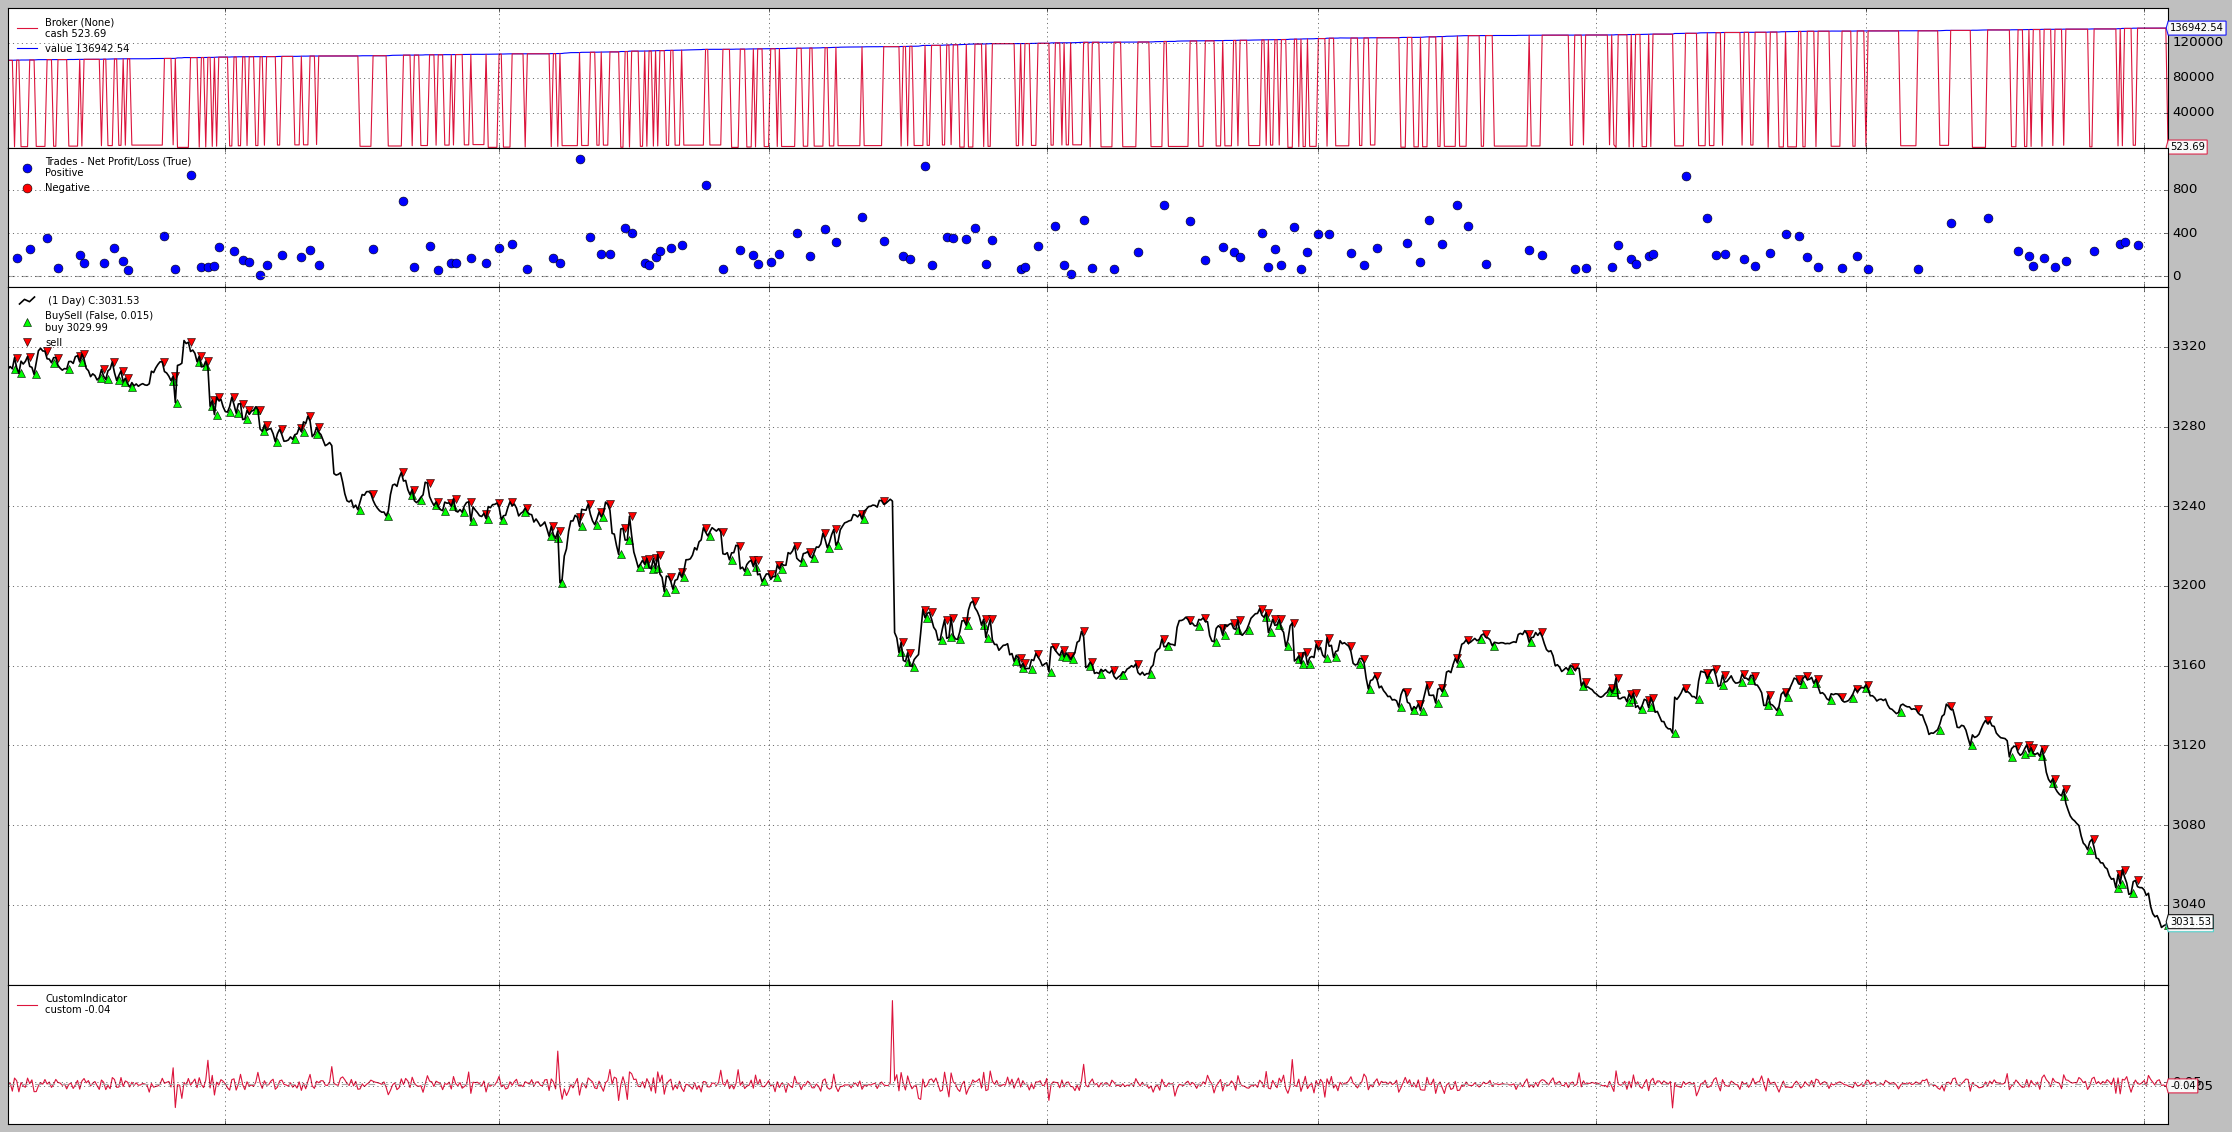

In [ ]:


# Backtest the predictions, given that we buy bitcoin when the predicted next day return is > +1.5%, and sell when it's < -1.5%.
df1=df.reset_index()[["dt", "close"]]
# df["custom"] = df["close"].shift(-1)
# backtest("custom", df.dropna(),upper_limit=1.5, lower_limit=-1.5)
df1['avg_tot_assets'] = df1["close"].rolling(window=5).mean() 
# df1["close"]=df1['avg_tot_assets']
df1["custom"] = df1.close.pct_change().shift(-1).multiply(100).multiply(-1)
re2=backtest("custom", df1.dropna(),upper_limit=0.05, lower_limit=-0.05)

In [ ]:
re2=hyperparameter_SMA(df)

Starting Portfolio Value: 100000.00
2022-01-27T00:00:00, ===Global level arguments===
2022-01-27T00:00:00, init_cash : 100000
2022-01-27T00:00:00, buy_prop : 1
2022-01-27T00:00:00, sell_prop : 1
2022-01-27T00:00:00, commission : 0
2022-01-27T00:00:00, stop_loss : 0
2022-01-27T00:00:00, stop_trail : 0
2022-01-27T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 10
slow_period : 30
2022-01-27T00:00:00, Final Portfolio Value: 168715.68420410156
2022-01-27T00:00:00, Final PnL: 68715.68
Time used (seconds): 0.9316980838775635
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_

In [ ]:
re2["final_value"]

0    168715.684204
Name: final_value, dtype: float64

In [ ]:
re1=Multi_strategies(df)


Streaming output truncated to the last 5000 lines.
2021-04-19T00:00:00, Price: 3176.6
2021-04-19T00:00:00, Buy prop size: 31.48355453650423
2021-04-19T00:00:00, Afforded size: 31.48355453650423
2021-04-19T00:00:00, Final size: 31
2021-04-20T00:00:00, BUY EXECUTED, Price: 3176.60, Cost: 98474.60, Comm: 0.00, Size: 31.00
2021-04-23T00:00:00, SELL CREATE, 3162.00
2021-04-26T00:00:00, SELL EXECUTED, Price: 3162.66, Cost: 98474.60, Comm: 0.00, Size: -31.00
2021-06-23T00:00:00, BUY CREATE, 3170.65
2021-06-23T00:00:00, Cash: 99678.52999999998
2021-06-23T00:00:00, Price: 3170.65
2021-06-23T00:00:00, Buy prop size: 31.406478497768926
2021-06-23T00:00:00, Afforded size: 31.406478497768926
2021-06-23T00:00:00, Final size: 31
2021-06-24T00:00:00, BUY EXECUTED, Price: 3170.65, Cost: 98290.15, Comm: 0.00, Size: 31.00
2021-06-24T00:00:00, SELL CREATE, 3167.70
2021-06-25T00:00:00, SELL EXECUTED, Price: 3170.64, Cost: 98290.15, Comm: 0.00, Size: -31.00
2021-08-26T00:00:00, BUY CREATE, 3160.18
2021-08-2

In [ ]:
re1

strat_id  init_cash  buy_prop  ...  won_max_prcnt  lost_max  lost_max_prcnt
0         328     100000         1  ...            NaN       NaN             NaN
1         324     100000         1  ...            NaN       NaN             NaN
2         326     100000         1  ...            NaN       NaN             NaN
3         364     100000         1  ...            NaN       NaN             NaN
4         360     100000         1  ...            NaN       NaN             NaN
..        ...        ...       ...  ...            ...       ...             ...
481       132     100000         1  ...            NaN       NaN             NaN
482       122     100000         1  ...            NaN       NaN             NaN
483       156     100000         1  ...            NaN       NaN             NaN
484       158     100000         1  ...            NaN       NaN             NaN
485       120     100000         1  ...            NaN       NaN             NaN

[486 rows x 79 columns]

In [ ]:

# hyperparameter tuning for all strategies 
# select the best one within each strategies

def hyperparameter_SMA(df):
  results=[]
  final_values=[]


  fast_periods=[5,10,15,20,25,30,35,40,50]
  slow_periods=range(10,100,10)
  for fast in fast_periods:

    for slow in slow_periods:
      if fast<slow:

        result=backtest('smac', df, fast_period=fast, slow_period=slow,plot=False)
        results.append(result)
        final_values.append(result.final_value[0])
    
  max_index=final_values.index(max(final_values))
  best_result= results[max_index]

  return best_result



def hyperparameter_EMA(df):
  results=[]
  final_values=[]


  fast_periods=[5,10,15,20,25]
  slow_periods=range(10,100,10)
  for fast in fast_periods:

    for slow in slow_periods:

      result=backtest('emac', df, fast_period=fast, slow_period=slow,plot=False)
      results.append(result)
      final_values.append(result.final_value[0])
    
  max_index=final_values.index(max(final_values))
  best_result= results[max_index]

  return best_result



def hyperparameter_Bbands(df):
  results=[]
  final_values=[]


  peroids=[10,15,20,25]
  dev_factor=[2,2.5,3,3.5]
  for peroid in peroids:

    for dev in dev_factor:
      
      result=backtest('bbands', df, period=peroid, devfactor=dev,plot=False)
      results.append(result)
      final_values.append(result.final_value[0])
    
  max_index=final_values.index(max(final_values))
  best_result= results[max_index]

  return best_result


In [ ]:
re_sma=hyperparameter_SMA(df)

Starting Portfolio Value: 100000.00
2022-02-15T00:00:00, ===Global level arguments===
2022-02-15T00:00:00, init_cash : 100000
2022-02-15T00:00:00, buy_prop : 1
2022-02-15T00:00:00, sell_prop : 1
2022-02-15T00:00:00, commission : 0
2022-02-15T00:00:00, stop_loss : 0
2022-02-15T00:00:00, stop_trail : 0
2022-02-15T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 5
slow_period : 10
2022-02-15T00:00:00, Final Portfolio Value: 94120.96499999998
2022-02-15T00:00:00, Final PnL: -5879.04
Time used (seconds): 0.9357445240020752
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_di

In [ ]:
re_sma["slow_period"]

0    60
Name: slow_period, dtype: int64

In [ ]:
#to get a dataframe that compare final result in each strategies
def Combine_Strategies_result(df,result):
  df1=pd.DataFrame()
  df2=pd.DataFrame()
  df2["Initial Cash"]=[result.init_cash[0]]
  df2["Final Cash"]=[result.final_value[0]]
  df1=df1.append(df2)
  return df1


In [ ]:
# apply all strategies in data and compare the final_result

def GridSearchForStrategies(df):
  df1=pd.DataFrame()
  
  result=hyperparameter_SMA(df)
  df1=df1.append(Combine_Strategies_result(df1,result))

  result=backtest('emac', df, fast_period=10, slow_period=30,plot=False)
  df1=df1.append(Combine_Strategies_result(df1,result))


  result=backtest('macd', df, fast_period=12, slow_period=26, signal_period=9, sma_period=30, dir_period=10,plot=False)
  df1=df1.append(Combine_Strategies_result(df1,result))

  result=hyperparameter_Bbands(df)
  df1=df1.append(Combine_Strategies_result(df1,result))

  result=prophet_strategy(df)
  df1=df1.append(Combine_Strategies_result(df1,result))

  result=Multi_strategies(df)
  df1=df1.append(Combine_Strategies_result(df1,result))

  result=Multi_strategies1(df)
  df1=df1.append(Combine_Strategies_result(df1,result))

  result=HyperRsi(df)
  df1=df1.append(Combine_Strategies_result(df1,result))

  df1["Strategy"]=["smac","emac","macd","bbands","prophet","Multi","Multi1","RSI"]

  df1=df1.set_index(df1["Strategy"])
  df1.drop("Strategy",inplace=True,axis=1)



  
  # df1=df1.set_index(df1["Col"])
  return df1

In [ ]:
from fbprophet import Prophet
def prophet_strategy(df):
  
  ts = df.reset_index()[["dt", "Close"]]
  ts.columns = ['ds', 'y']
  m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(ts)
  forecast = m.make_future_dataframe(periods=0, freq='D')
  # print("shd",forecast)

  # Predict and plot
  pred = m.predict(forecast)
  print(pred)
  # fig1 = m.plot(pred)
  # plt.title('Price stock', fontsize=25)

  # Convert predictions to expected 1 day returns
  expected_1day_return = pred.set_index("ds").yhat.pct_change().shift(-1).multiply(100)



  df["custom"] = expected_1day_return.multiply(-1)
  result=backtest("custom", df.dropna(),upper_limit=0.001, lower_limit=0.001,plot=False)
  return result


Importing matplotlib failed. Plotting will not work.


In [ ]:
re_emac=hyperparameter_EMA(df)

Starting Portfolio Value: 100000.00
2022-02-09T00:00:00, ===Global level arguments===
2022-02-09T00:00:00, init_cash : 100000
2022-02-09T00:00:00, buy_prop : 1
2022-02-09T00:00:00, sell_prop : 1
2022-02-09T00:00:00, commission : 0
2022-02-09T00:00:00, stop_loss : 0
2022-02-09T00:00:00, stop_trail : 0
2022-02-09T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 5
slow_period : 10
2022-02-09T00:00:00, Final Portfolio Value: 102234.99000000005
2022-02-09T00:00:00, Final PnL: 2234.99
Time used (seconds): 2.784780740737915
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['emac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div

In [ ]:
re_emac["final_value"]

0    102705.14
Name: final_value, dtype: float64

In [ ]:
ree=hyperparameter_SMA(df)

Starting Portfolio Value: 100000.00
2022-01-27T00:00:00, ===Global level arguments===
2022-01-27T00:00:00, init_cash : 100000
2022-01-27T00:00:00, buy_prop : 1
2022-01-27T00:00:00, sell_prop : 1
2022-01-27T00:00:00, commission : 0
2022-01-27T00:00:00, stop_loss : 0
2022-01-27T00:00:00, stop_trail : 0
2022-01-27T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 10
slow_period : 30
2022-01-27T00:00:00, Final Portfolio Value: 103736.82499999995
2022-01-27T00:00:00, Final PnL: 3736.82
Time used (seconds): 2.6518285274505615
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_d

In [ ]:
ree

strat_id  init_cash  buy_prop  ...  won_max_prcnt  lost_max  lost_max_prcnt
0         0     100000         1  ...        2.60908   -1036.0          -1.036

[1 rows x 46 columns]

In [ ]:
re=GridSearchForStrategies(df)
# df.shape

Starting Portfolio Value: 100000.00
2022-02-09T00:00:00, ===Global level arguments===
2022-02-09T00:00:00, init_cash : 100000
2022-02-09T00:00:00, buy_prop : 1
2022-02-09T00:00:00, sell_prop : 1
2022-02-09T00:00:00, commission : 0
2022-02-09T00:00:00, stop_loss : 0
2022-02-09T00:00:00, stop_trail : 0
2022-02-09T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 5
slow_period : 10
2022-02-09T00:00:00, Final Portfolio Value: 101636.80000000008
2022-02-09T00:00:00, Final PnL: 1636.8
Time used (seconds): 2.5590577125549316
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div

ModuleNotFoundError: ignored

In [ ]:
 !pip install pandas-datareader

In [ ]:
re_sma=hyperparameter_SMA(df)

Starting Portfolio Value: 100000.00
2022-02-10T00:00:00, ===Global level arguments===
2022-02-10T00:00:00, init_cash : 100000
2022-02-10T00:00:00, buy_prop : 1
2022-02-10T00:00:00, sell_prop : 1
2022-02-10T00:00:00, commission : 0
2022-02-10T00:00:00, stop_loss : 0
2022-02-10T00:00:00, stop_trail : 0
2022-02-10T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 5
slow_period : 10
2022-02-10T00:00:00, Final Portfolio Value: 100145.69
2022-02-10T00:00:00, Final PnL: 145.69
Time used (seconds): 1.049043893814087
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	fast

In [ ]:
re_sma

ModuleNotFoundError: ignored

ImportError: ignored

In [ ]:
re_bband=hyperparameter_Bbands(df)

Starting Portfolio Value: 100000.00
2022-02-09T00:00:00, ===Global level arguments===
2022-02-09T00:00:00, init_cash : 100000
2022-02-09T00:00:00, buy_prop : 1
2022-02-09T00:00:00, sell_prop : 1
2022-02-09T00:00:00, commission : 0
2022-02-09T00:00:00, stop_loss : 0
2022-02-09T00:00:00, stop_trail : 0
2022-02-09T00:00:00, take_profit : 0
===Strategy level arguments===
period : 10
devfactor : 2
2022-02-09T00:00:00, Final Portfolio Value: 100002.64499999997
2022-02-09T00:00:00, Final PnL: 2.64
Time used (seconds): 2.821676254272461
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['bbands']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	pe

In [ ]:
result=GridSearchForStrategies(df)
result=result.sort_values("Final Cash",ascending=False)

Streaming output truncated to the last 5000 lines.
2018-10-04T00:00:00, Afforded size: 31.07868933073442
2018-10-04T00:00:00, Final size: 31
2018-10-05T00:00:00, BUY EXECUTED, Price: 3201.57, Cost: 99248.67, Comm: 0.00, Size: 31.00
2018-10-11T00:00:00, SELL CREATE, 3232.61
2018-10-12T00:00:00, SELL EXECUTED, Price: 3232.60, Cost: 99248.67, Comm: 0.00, Size: -31.00
2018-10-12T00:00:00, OPERATION PROFIT, GROSS: 961.93, NET: 961.93
2019-05-17T00:00:00, BUY CREATE, 3176.60
2019-05-17T00:00:00, Cash: 100562.02999999998
2019-05-17T00:00:00, Price: 3176.6
2019-05-17T00:00:00, Buy prop size: 31.62550161542795
2019-05-17T00:00:00, Afforded size: 31.62550161542795
2019-05-17T00:00:00, Final size: 31
2019-05-20T00:00:00, BUY EXECUTED, Price: 3176.60, Cost: 98474.60, Comm: 0.00, Size: 31.00
2019-07-08T00:00:00, SELL CREATE, 3191.41
2019-07-09T00:00:00, SELL EXECUTED, Price: 3187.94, Cost: 98474.60, Comm: 0.00, Size: -31.00
2019-07-09T00:00:00, OPERATION PROFIT, GROSS: 351.54, NET: 351.54
2020-03-3

In [ ]:
result=Multi_strategies(df)

Streaming output truncated to the last 5000 lines.
2022-02-09T00:00:00, sell_prop : 1
2022-02-09T00:00:00, commission : 0
2022-02-09T00:00:00, stop_loss : 0
2022-02-09T00:00:00, stop_trail : 0
2022-02-09T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 20
slow_period : 40
2022-02-09T00:00:00, ===Global level arguments===
2022-02-09T00:00:00, init_cash : 100000
2022-02-09T00:00:00, buy_prop : 1
2022-02-09T00:00:00, sell_prop : 1
2022-02-09T00:00:00, commission : 0
2022-02-09T00:00:00, stop_loss : 0
2022-02-09T00:00:00, stop_trail : 0
2022-02-09T00:00:00, take_profit : 0
===Strategy level arguments===
period : 20
devfactor : 5.0
2018-09-04T00:00:00, BUY CREATE, 3219.87
2018-09-04T00:00:00, Cash: 100000.0
2018-09-04T00:00:00, Price: 3219.87
2018-09-04T00:00:00, Buy prop size: 31.026128353039073
2018-09-04T00:00:00, Afforded size: 31.026128353039073
2018-09-04T00:00:00, Final size: 31
2018-09-05T00:00:00, BUY EXECUTED, Price: 3219.87, Cost: 99815.97, Comm: 0.00, Size:

In [ ]:
result["final_value"]

0     102133.515
1     101712.130
2     101625.795
3     101425.380
4     101391.345
         ...    
76     98650.450
77     98550.585
78     98304.370
79     98280.110
80     98032.075
Name: final_value, Length: 81, dtype: float64

### Draft note

In [ ]:

# df=df.drop_duplicates(subset='Date', keep="last")
# df["Close"]=df["CLOSING"].astype(float)

# df=df[["Date","Close"]]
# df.to_csv("/content/drive/MyDrive/stock_data/generated/stock1_test.csv",index=False)
# df=df.rename(columns={"Date":"dt"})

# df.head()

#apply strategies
# backtest('smac', df, fast_period=15, slow_period=40)
# backtest('emac', df, fast_period=10, slow_period=30)
# backtest('macd', df, fast_period=12, slow_period=26, signal_period=9, sma_period=30, dir_period=10)
# backtest('bbands', df, period=20, devfactor=2.0)


# backtest("smac", df, fast_period=[1,5], slow_period=range(40, 45, 5), verbose=False)

# Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'execution_type': 'close', 'fast_period': 15, 'slow_period': 40}
# Optimal metrics: {'rtot': 0.022, 'ravg': 9.25e-05, 'rnorm': 0.024, 'rnorm100': 2.36, 'sharperatio': None, 'pnl': 2272.9, 'final_value': 102272.90}

# print(res[['fast_period', 'slow_period', 'final_value']].head())


# strats = { 
#     "smac": {"fast_period": 35, "slow_period": 50}, 
#     "rsi": {"rsi_lower": 30, "rsi_upper": 70} 
# } 
# res = backtest("multi", df, strats=strats)
# res.shape
# # (1, 16)


# # Utilize auto grid search
# strats_opt = { 
#     "smac": {"fast_period": [10,15,20], "slow_period":[40,45,50]}, 
#     "rsi": {"rsi_lower": [15, 30], "rsi_upper": 70},
#     'bbands':{"period":[20,10,30], "devfactor":[2.0,3.0,5.0]}

# } 

# res_opt = backtest("multi", df, strats=strats_opt)

# result=backtest('smac', df, fast_period=15, slow_period=90)

### Runing and Fit in fastquant

In [ ]:
for i in all_stocks:

  df=pd.read_csv(str(i))
  name=str(i).split("/")[-1]
  df=df[df["Close"]!=0]
  if Check_Long_Peroid_Missing(df)==True or name in finish_test:
    print("Alot of missing or already test")
    continue

  else:
    df1=make_to_fit_form(df)
    df1=df1[df1["Close"]!=0]

    try:
      result=GridSearchForStrategies(df1)
      result=result.sort_values("Final Cash",ascending=False)
      result.to_csv("/content/drive/MyDrive/stock_data/Result2/"+name)
    except:
      pass

NameError: ignored

In [ ]:
# df=pd.read_csv("/content/drive/MyDrive/stock_data/generated/stock20.csv",parse_dates=True)
# df=make_to_fit_form(df)
# df["Close"].plot()
# df.shape
# df=pd.read_csv(str(all_stocks[0]))
# df.to_csv("me.csv",header="Me")
# pd.read_csv("me.csv")




1

Starting Portfolio Value: 100000.00
2021-09-14T00:00:00, ===Global level arguments===
2021-09-14T00:00:00, init_cash : 100000
2021-09-14T00:00:00, buy_prop : 1
2021-09-14T00:00:00, sell_prop : 1
2021-09-14T00:00:00, commission : 0
2021-09-14T00:00:00, stop_loss : 0
2021-09-14T00:00:00, stop_trail : 0
2021-09-14T00:00:00, take_profit : 0
===Strategy level arguments===
Upper limit:  1.5
Lower limit:  1.5
2021-09-14T00:00:00, Final Portfolio Value: 92492.65
2021-09-14T00:00:00, Final PnL: -7507.35
Time used (seconds): 0.3188955783843994
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['custom']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	upper_limit:1.5	lower_limit:1.5	c

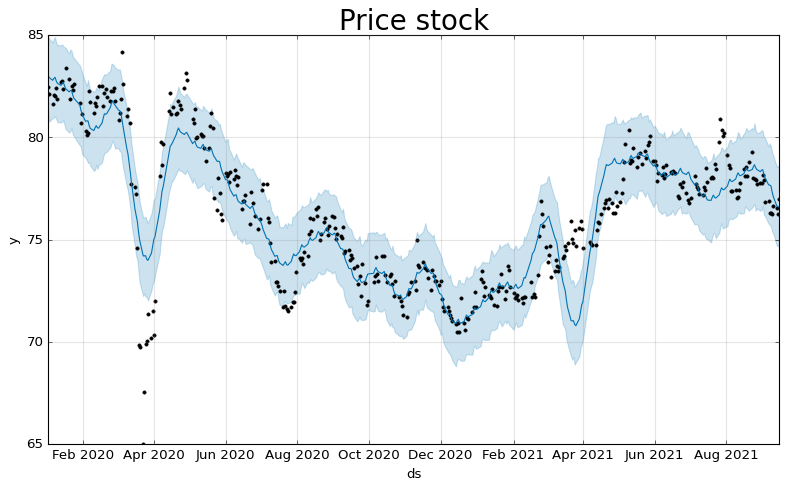

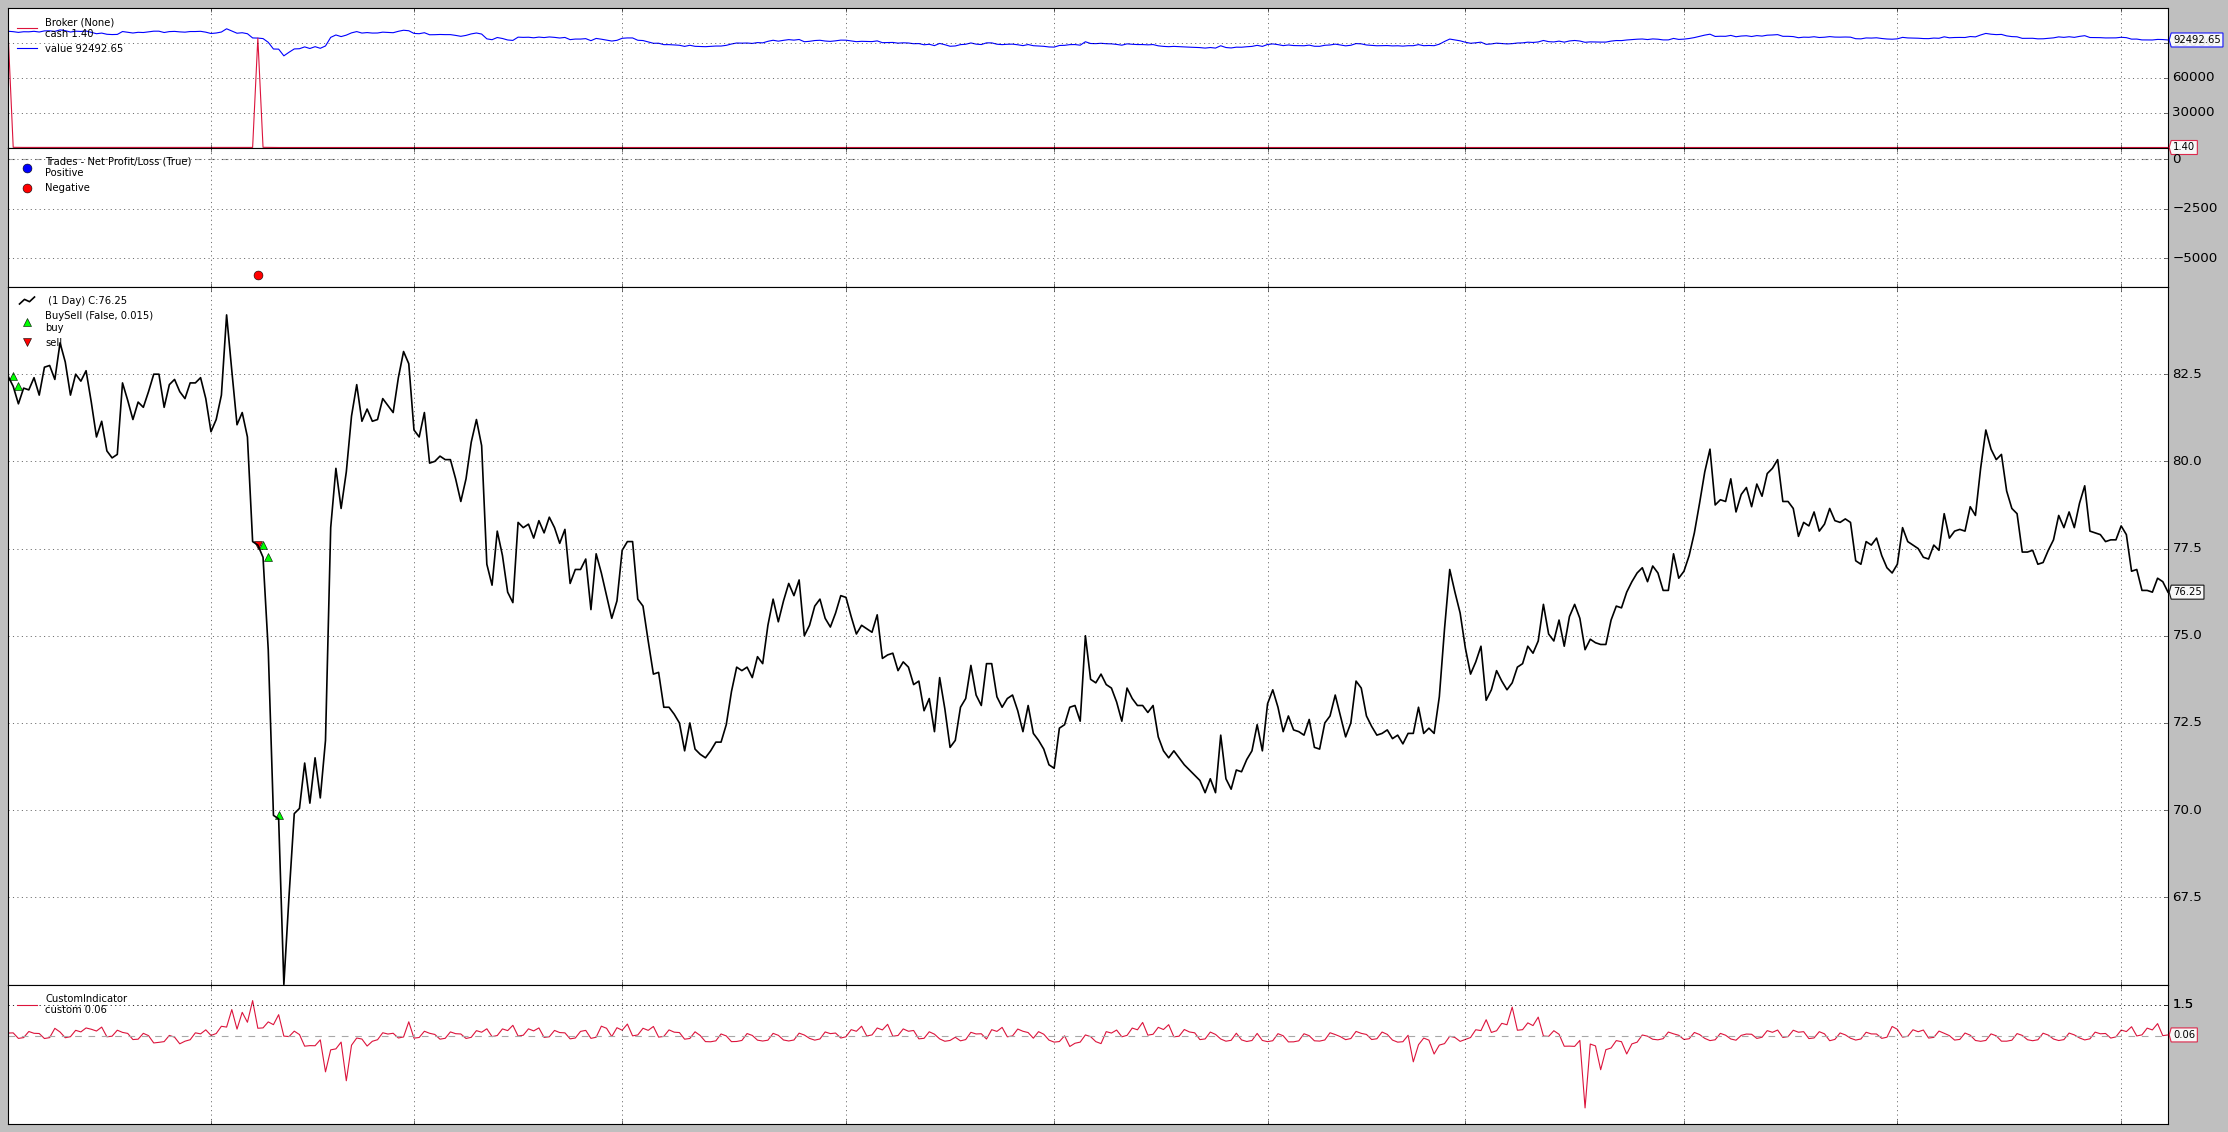

strat_id  init_cash  buy_prop  ...  won_max_prcnt  lost_max  lost_max_prcnt
0         0     100000         1  ...            0.0   -5877.9         -5.8779

[1 rows x 45 columns]

In [ ]:
from fbprophet import Prophet
ts = df.reset_index()[["dt", "Close"]]
ts.columns = ['ds', 'y']
m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(ts)
forecast = m.make_future_dataframe(periods=0, freq='D')

# Predict and plot
pred = m.predict(forecast)
fig1 = m.plot(pred)
plt.title('Price stock', fontsize=25)



# Convert predictions to expected 1 day returns
expected_1day_return = pred.set_index("ds").yhat.pct_change().shift(-1).multiply(100)

# Backtest the predictions, given that we buy bitcoin when the predicted next day return is > +1.5%, and sell when it's < -1.5%.
df["custom"] = expected_1day_return.multiply(-1)
backtest("custom", df.dropna(),upper_limit=0.01, lower_limit=0.01)


## use custom strategies

Text(0.5, 1.0, 'BTC/USDT: Forecasted Daily Closing Price')

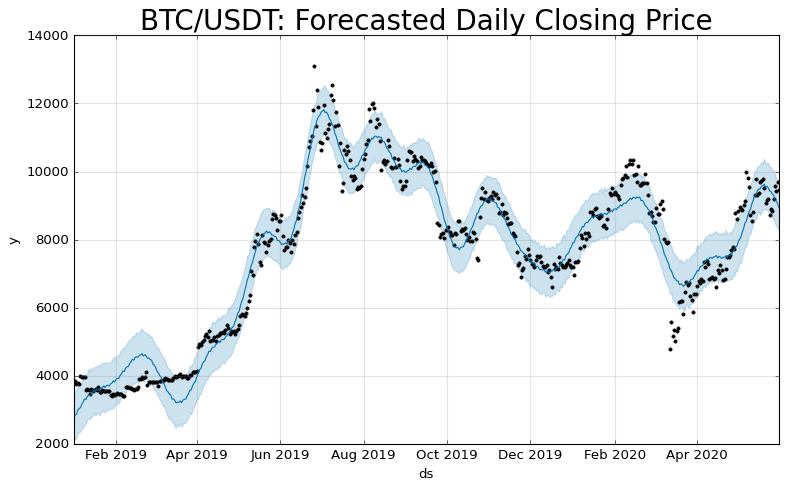

In [ ]:
from fastquant import get_crypto_data, backtest
from fbprophet import Prophet
from matplotlib import pyplot as plt

# Pull crypto data
df = get_crypto_data("BTC/USDT", "2019-01-01", "2020-05-31")

# Fit model on closing prices
ts = df.reset_index()[["dt", "close"]]
ts.columns = ['ds', 'y']
m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(ts)
forecast = m.make_future_dataframe(periods=0, freq='D')

# Predict and plot
pred = m.predict(forecast)
fig1 = m.plot(pred)
plt.title('BTC/USDT: Forecasted Daily Closing Price', fontsize=25)

Starting Portfolio Value: 100000.00
2020-05-30T00:00:00, ===Global level arguments===
2020-05-30T00:00:00, init_cash : 100000
2020-05-30T00:00:00, buy_prop : 1
2020-05-30T00:00:00, sell_prop : 1
2020-05-30T00:00:00, commission : 0
2020-05-30T00:00:00, stop_loss : 0
2020-05-30T00:00:00, stop_trail : 0
2020-05-30T00:00:00, take_profit : 0
===Strategy level arguments===
Upper limit:  1.5
Lower limit:  -1.5
2020-05-30T00:00:00, Final Portfolio Value: 424380.15
2020-05-30T00:00:00, Final PnL: 324380.15
Time used (seconds): 0.31440019607543945
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['custom']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	invest_div:True	upper_limit:1.5	lower_limit:-

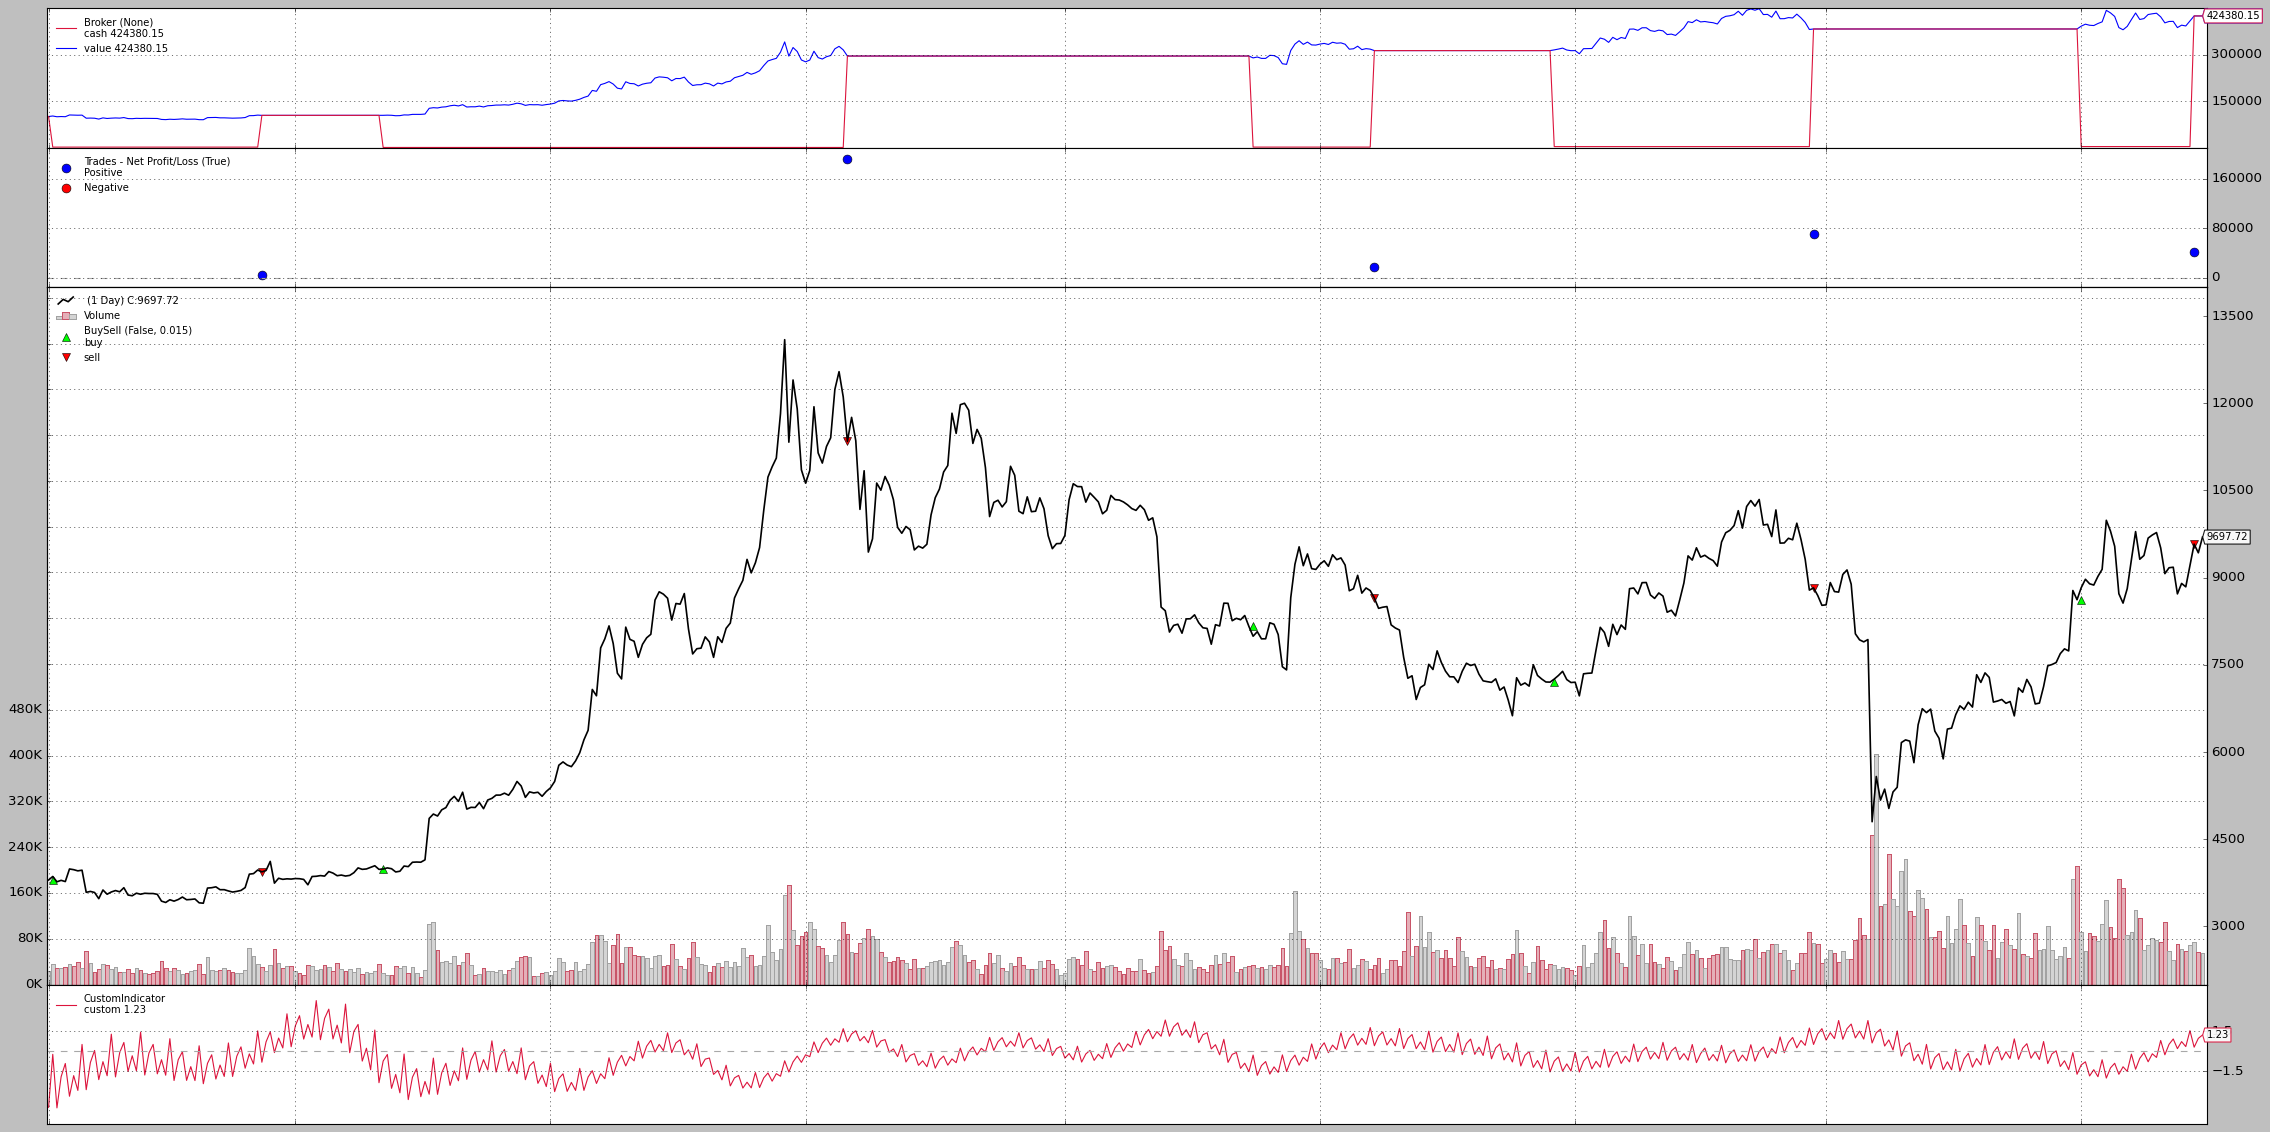

strat_id  init_cash  buy_prop  ...  won_max_prcnt  lost_max  lost_max_prcnt
0         0     100000         1  ...       191.4185       0.0             0.0

[1 rows x 45 columns]

In [ ]:
# Convert predictions to expected 1 day returns
expected_1day_return = pred.set_index("ds").yhat.pct_change().shift(-1).multiply(100)

# Backtest the predictions, given that we buy bitcoin when the predicted next day return is > +1.5%, and sell when it's < -1.5%.
df["custom"] = expected_1day_return.multiply(-1)
backtest("custom", df.dropna(),upper_limit=1.5, lower_limit=-1.5)